#### Citation
Dickson, E., Grambsch, P., Fleming, T., Fisher, L., & Langworthy, A. (1989). Cirrhosis Patient Survival Prediction [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5R02G.


#### Practice API: Data extraction using Application Programmin Interface 

In [29]:
import requests # API web scrapping
import json # JavaScript Object Notation 
#import uuid # Universally Unique Identifier
#uuid.uuid4() # generates a random uuid

# get() returns the status code
response = requests.get("https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1")
response # Code 200: Everything went ok

from urllib.request import urlopen
url = "https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1"
page = urlopen(url)
page # HTTP Response Object 

html_bytes = page.read() #returns sequence of bytes of HTTP Response Object 
html = html_bytes.decode("utf-8") # decode the bytes to a string 
#print(html)



In [3]:
# load required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
cirrhosis = pd.read_csv("C:/Users/minjk/Downloads/cirrhosis+patient+survival+prediction+dataset-1/cirrhosis.csv")
data = pd.DataFrame(cirrhosis)
#data.Drug.value_counts(dropna = False) 
# make pie chart

ID                     6
N_Days              2503
Status                 D
Drug             Placebo
Age                24201
Sex                    F
Ascites                N
Hepatomegaly           Y
Spiders                N
Edema                  N
Bilirubin            0.8
Cholesterol        248.0
Albumin             3.98
Copper              50.0
Alk_Phos           944.0
SGOT                93.0
Tryglicerides       63.0
Platelets            NaN
Prothrombin         11.0
Stage                3.0
Name: 5, dtype: object

In [90]:
from IPython.display import Image

In [134]:
# Summary Statistics 
data.describe()
np.round(data.describe(), 2).T

#save the summary statistics as .csv file
np.round(data.describe(), 2).T[['count','mean', 'std', 'min', 'max']].to_csv('summary stats.csv', sep=',')

#from IPython.display import Image
np.round(data.describe(), 2).T[['count','mean', 'std', 'min', 'max']].to_latex('summary stats.tex')
print(np.round(data.describe(), 2).T[['count','mean', 'std', 'min', 'max']].to_latex())

\begin{tabular}{lrrrrr}
\toprule
 & count & mean & std & min & max \\
\midrule
ID & 312.000000 & 156.500000 & 90.210000 & 1.000000 & 312.000000 \\
N_Days & 312.000000 & 2006.360000 & 1123.280000 & 41.000000 & 4556.000000 \\
Age & 312.000000 & 18269.440000 & 3864.810000 & 9598.000000 & 28650.000000 \\
Bilirubin & 312.000000 & 3.260000 & 4.530000 & 0.300000 & 28.000000 \\
Cholesterol & 284.000000 & 369.510000 & 231.940000 & 120.000000 & 1775.000000 \\
Albumin & 312.000000 & 3.520000 & 0.420000 & 1.960000 & 4.640000 \\
Copper & 310.000000 & 97.650000 & 85.610000 & 4.000000 & 588.000000 \\
Alk_Phos & 312.000000 & 1982.660000 & 2140.390000 & 289.000000 & 13862.400000 \\
SGOT & 312.000000 & 122.560000 & 56.700000 & 26.350000 & 457.250000 \\
Tryglicerides & 282.000000 & 124.700000 & 65.150000 & 33.000000 & 598.000000 \\
Platelets & 308.000000 & 261.940000 & 95.610000 & 62.000000 & 563.000000 \\
Prothrombin & 312.000000 & 10.730000 & 1.000000 & 9.000000 & 17.100000 \\
Stage & 312.000000 & 3.03

In [138]:
from IPython.display import Image
Image(width=600, filename='Descriptive Statistics Table.bmp') 

ValueError: Cannot embed the 'bmp' image format

In [6]:
data
data.Status.value_counts()

Status
C     232
D     161
CL     25
Name: count, dtype: int64

In [8]:
data['age'] = data.Age/365 # new age column since the Age column is in days 

In [12]:
for i in range(0,418): 
    if data.Status[i] == 'D': # 0: Death
        data.Status[i] = 0
    elif data.Status[i] == 'C': # 1: Censored
        data.Status[i] = 1
    elif data.Status[i] == 'CL': # 2: Censored due to liver transplantation
        data.Status[i] = 2
data.Status.value_counts() # to check the distribution of status 
data

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,...,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,age
0,1,400,0,D-penicillamine,21464,F,Y,Y,Y,Y,...,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,58.805479
1,2,4500,1,D-penicillamine,20617,F,N,Y,Y,N,...,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,56.484932
2,3,1012,0,D-penicillamine,25594,M,N,N,N,S,...,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0,70.120548
3,4,1925,0,D-penicillamine,19994,F,N,Y,Y,S,...,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0,54.778082
4,5,1504,2,Placebo,13918,F,N,Y,Y,N,...,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,38.131507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,0,NaN,24472,F,NaN,NaN,NaN,N,...,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0,67.046575
414,415,1103,1,NaN,14245,F,NaN,NaN,NaN,N,...,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0,39.027397
415,416,1055,1,NaN,20819,F,NaN,NaN,NaN,N,...,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0,57.038356
416,417,691,1,NaN,21185,F,NaN,NaN,NaN,N,...,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0,58.041096


In [14]:
data.isnull().sum()
data = data[data['Drug'].notna()]
data
# Data Citation  
#Dickson,E., Grambsch,P., Fleming,T., Fisher,L., and Langworthy,A.. (2023). Cirrhosis Patient Survival Prediction. UCI Machine Learning Repository. https://doi.org/10.24432/C5R02G.

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,...,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,age
0,1,400,0,D-penicillamine,21464,F,Y,Y,Y,Y,...,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,58.805479
1,2,4500,1,D-penicillamine,20617,F,N,Y,Y,N,...,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,56.484932
2,3,1012,0,D-penicillamine,25594,M,N,N,N,S,...,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0,70.120548
3,4,1925,0,D-penicillamine,19994,F,N,Y,Y,S,...,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0,54.778082
4,5,1504,2,Placebo,13918,F,N,Y,Y,N,...,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,38.131507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,1,D-penicillamine,22347,F,N,Y,N,N,...,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0,61.224658
308,309,994,1,Placebo,21294,F,N,N,N,N,...,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0,58.339726
309,310,939,1,D-penicillamine,22767,F,N,N,N,N,...,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0,62.375342
310,311,839,1,D-penicillamine,13879,F,N,N,N,N,...,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0,38.024658


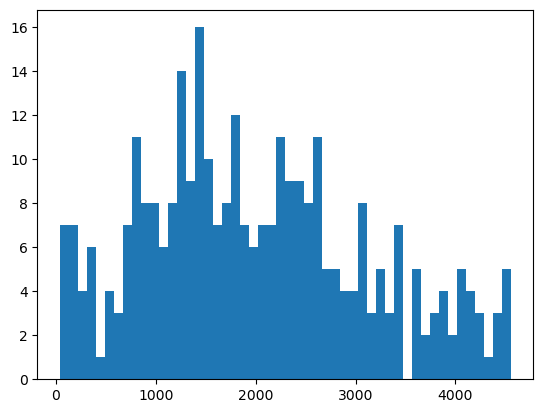

In [166]:
# Plot time 
time = data["N_Days"]
event = data['Status']
plt.hist(time, bins = 50)
plt.show()

In [16]:
# install package for survival analysis 
# !pip install lifelines 

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/349.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/349.3 kB ? eta -:--:--
   ---------------------------- ----------- 245.8/349.3 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 349.3/349.3 kB 3.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/52.5 kB ? eta -:--:--
   ---------------------------------------- 52.5/52.5 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/94.5 kB ? eta -:--:--
   ---------------------------------------- 94.5/94.5 kB 5.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4050 sha256=571f7dab707d9ed4e069dc30fdc76f49ac1e03570e0f7e6e2a31de51ee109f06
  Stored in directory: c:\users\minjk\appdata\local\pip\cache\wheels\50\37\21\0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Succe

In [18]:
from lifelines import KaplanMeierFitter
#from scipy.optimize import minimize

C:\Users\minjk\anaconda3\Lib\site-packages\lifelines\utils\__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<Axes: xlabel='timeline'>

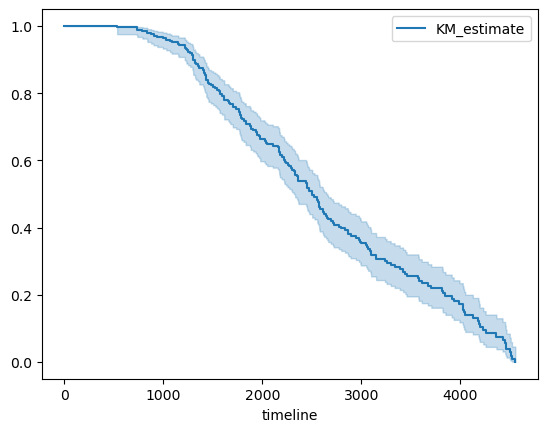

In [24]:
# Steps for plotting Kaplan Meier Curve
# 1. KaplanMeierFitter() class object
# 2. 
kmf = KaplanMeierFitter()
kmf.fit(durations = data["N_Days"], event_observed = data['Status'])
kmf.plot_survival_function() #As the time passes, survival probability of cirrohosis reduces.

<Axes: xlabel='timeline'>

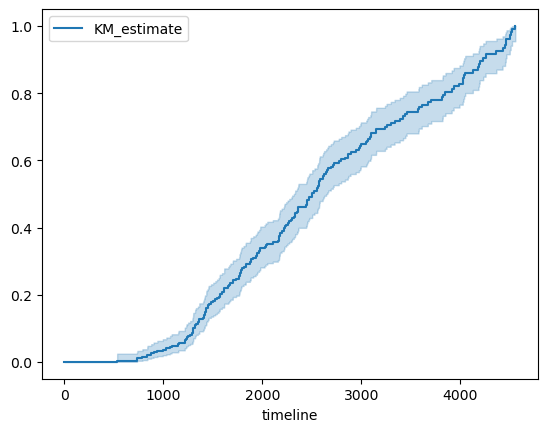

In [26]:
# Plot failure curve which is opposite to the survival plot
kmf.plot_cumulative_density()

In [30]:
# Median Survival Time and Confidence Interval
from lifelines.utils import median_survival_times
median= kmf.median_survival_time_ 
median_confidence_interval = median_survival_times(kmf.confidence_interval_)

print(median)
print(median_confidence_interval)
#The median survival time for cirrohosis is 2504 days

2504.0
     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                  2318.0                  2657.0


In [36]:
(data["Sex"] == "M")

0      False
1      False
2       True
3      False
4      False
       ...  
307    False
308    False
309    False
310    False
311    False
Name: Sex, Length: 312, dtype: bool

C:\Users\minjk\anaconda3\Lib\site-packages\lifelines\utils\__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
C:\Users\minjk\anaconda3\Lib\site-packages\lifelines\utils\__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


Text(0.5, 1.0, 'Survival of Cirrohosis by different gender')

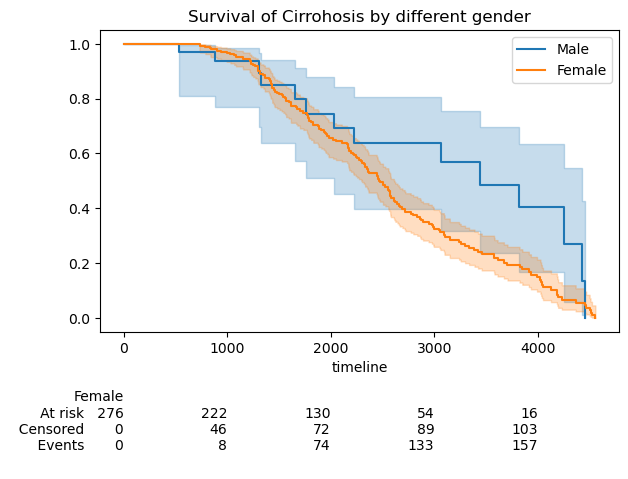

In [140]:
# Kaplan Meier Plot for Gender
import matplotlib.pyplot as plt
ax = plt.subplot(111) # create an axis object
male  = (data["Sex"] == "M")
female = (data["Sex"] == "F") 
kmf.fit(durations = time[male], event_observed = event[male],label = "Male")
kmf.plot_survival_function(ax = ax)
kmf.fit(time[female], event_observed = event[female], label = "Female")
#kmf.fit(time[~male], event_observed = event[~male], label  = "Female")
kmf.plot_survival_function(ax = ax, at_risk_counts = True)
plt.title("Survival of Cirrohosis by different gender") 

In [60]:
data["Sex"].value_counts()

Sex
F    276
M     36
Name: count, dtype: int64